# Matplotlib

Matplotlib is the de-facto library used in Python to create visualizations.

There are two common approaches to plotting with Matplotlib.  

1. The pyplot API:  pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.


2. The object-oriented API: At its core, Matplotlib is object-oriented and this interface allows more control and customization of your plots.

In this lesson, we will focus on pyplot interface only.


## Line and Scatter Charts

Convention is to import the `pyplot` module as `plt`.


In [1]:
import matplotlib.pyplot as plt

In [2]:
print(plt)

<module 'matplotlib.pyplot' from '/Users/zach/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>


### Line Charts

For the most basic example, we can create a sequence of numbers, then a chart (calling `.plot`), then call the `.show` method to display it.

Note that the act of creating the chart and showing it are two separate acts.


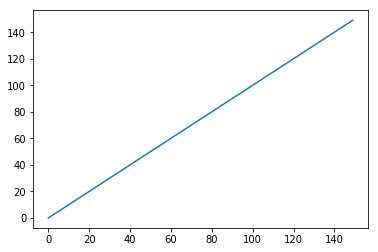

In [3]:
x = list(range(150))

plt.plot(x)
plt.show()

!!!tip "ipython Magic"
    Within a jupyter notebook, you can execute the following within a notebook cell:

    ```python
    %matplotlib inline
    ```

    This will show all of the charts you create inline in the notebook, and you will not explicitly have to call `plt.show()`. Note that this *will not* work in standalone Python scripts.

When given only one variable, it will be treated as y, and a range will be generated for us. We can also explicitly specify the x and y values. We could write the above example like so:


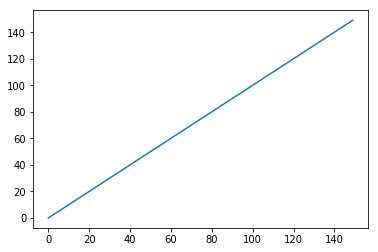

In [4]:
plt.plot(range(len(x)), x)
plt.show()

Once a chart is created (but before we `.show`) we can make modifications to our chart or build it up.

Here we'll change the limits of the x and y axis:


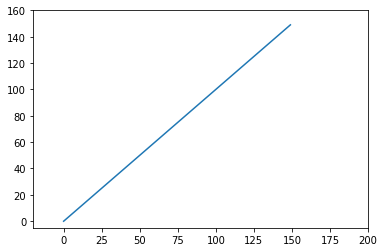

In [5]:
plt.plot(x)
plt.xlim(-20, 200)
plt.ylim(-5, 160)
plt.show()

We can change the color of the line with the `c` keyword argument to plot like this:


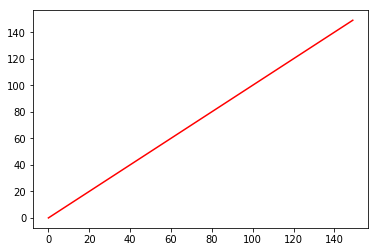

In [6]:
plt.plot(x, c='red')
plt.show()

We can display two series on the same chart by calling `.plot` multiple times before we call `.show`.


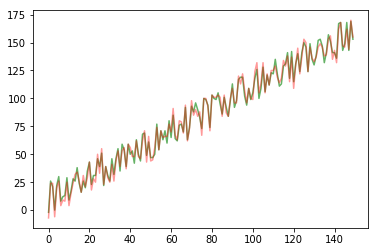

In [7]:
from random import randint

# Some random data
x1 = [randint(-5, 25) + n for n in range(150)]
x2 = [x + randint(-6, 6) for x in x1]

# we can use the alpha kwarg to define how transparent the color is
plt.plot(x1, c='green', alpha=0.6)
plt.plot(x2, c='red', alpha=0.4)
plt.show()

Until we call `.show`, we'll be referring to the same chart, so we can keep adding to it.

### Scatter Charts

Instead of calling `.plot`, we can call `.scatter` to create a scatter chart. Unlike `.plot`, `.scatter` requires two data series to plot against each other.


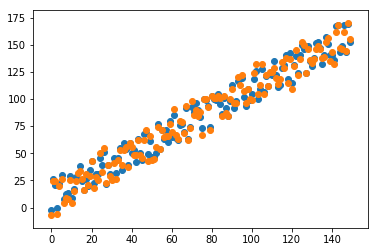

In [8]:
# plotting our random data from the last step
plt.scatter(range(len(x1)), x1)
plt.scatter(range(len(x2)), x2)
plt.show()

We can change the size of the points with the `s` keyword argument.
As shown in previous examples, we can change the color with `c`.



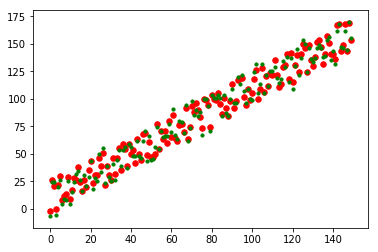

In [9]:
plt.scatter(range(len(x1)), x1, s=30, c='red')
plt.scatter(range(len(x2)), x2, s=10, c='green')
plt.show()

## Labels, Titles, and Axes

Titles can be added with the `.title` methods. Axis labels can be added with the `.xlabel` and `.ylabel` methods.


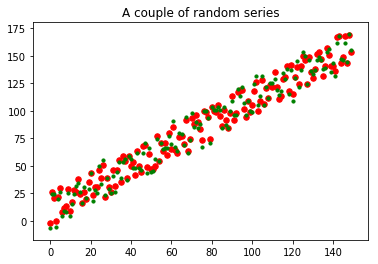

In [10]:
plt.scatter(range(len(x1)), x1, s=30, c='red')
plt.scatter(range(len(x2)), x2, s=10, c='green')
plt.title('A couple of random series')
plt.show()

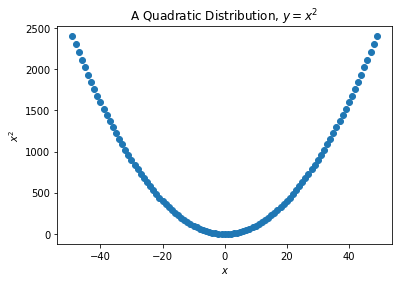

In [11]:
x = list(range(-49, 50))
y = [n ** 2 for n in x]
plt.scatter(x, y)
plt.title('A Quadratic Distribution, $y = x^2$')
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

Notice here we include some text inside of dollar signs in the labels. This allows us to write LaTeX math inside of our figures.

### Custom Ticks

We can specify custom ticks with the `.xticks` and `.yticks` methods. Both
methods require 2 arguments, a list of indices the custom ticks
will be placed at and a list of labels for the custom ticks.



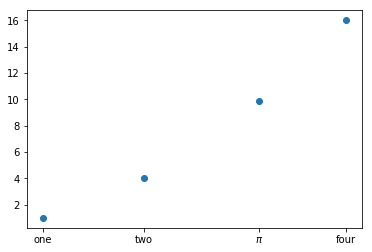

In [12]:
x = [1, 2, 3.14, 4]
y = [n ** 2 for n in x]
plt.scatter(x, y)
plt.xticks([1, 2, 3.14, 4], ['one', 'two', '$\pi$', 'four'])
plt.show()

### Custom Line Types

We can change the type of line on a line chart with the `ls` (line
style) keyword argument.

- `:` represents a dotted line
- `--` represents a dashed line



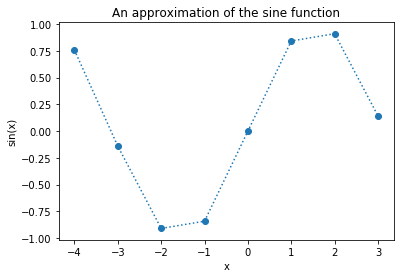

In [13]:
import math

x = range(-4, 4)
y = [math.sin(n) for n in x]
plt.scatter(x, y)
plt.plot(x, y, ls=':')
plt.title('An approximation of the sine function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

## Rotating Text and Annotations

Axis ticks can be rotated with the `rotation` keyword argument.


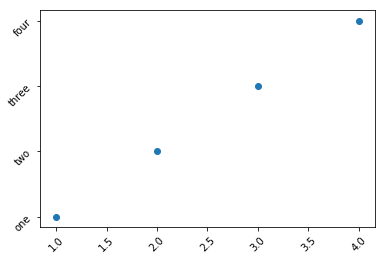

In [14]:
x = range(1, 5)
y = x
plt.scatter(x, y)
plt.yticks([1, 2, 3, 4], ['one', 'two', 'three', 'four'], rotation=45)
plt.xticks(rotation=45)
plt.show()

This can be particularly useful for dates or visualizing time data.



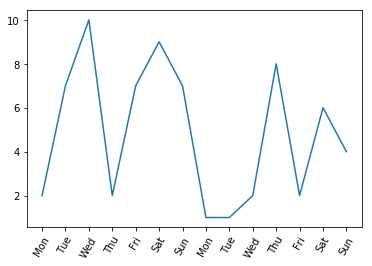

In [15]:
import random

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] * 2

x = range(14)
y = [random.randint(1, 10) for _ in x]
plt.plot(x, y)
plt.xticks(x, weekdays, rotation=60)
plt.show()

### Adding Text

We can use the `.text` to add arbitrary text to the chart.

We'll need to specify x and y coordinates for where the text should be placed. The coordinates provided specify where the left boundary of the text starts.

We can also specify the `color` and `fontsize` keyword arguments to change the presentation of the text.


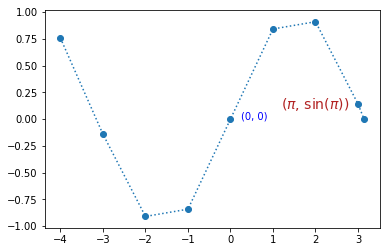

In [16]:
x = list(range(-4, 4))
x.append(3.14159)
y = [math.sin(n) for n in x]

plt.scatter(x, y)
plt.plot(x, y, ls=':')

plt.text(0.25, 0, '(0, 0)', fontsize=10, color='blue')
plt.text(1.2, 0.1, '($\pi$, sin($\pi$))', fontsize=14, color='firebrick')

plt.show()

Annotations can be even more fine-grained with the `.annotate` method.



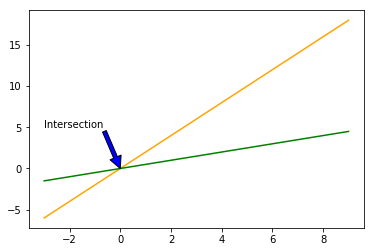

In [17]:
x = range(-3, 10)
y = [n * 2 for n in x]
z = [n / 2 for n in x]

plt.plot(x, y, c='orange')
plt.plot(x, z, c='green')

plt.annotate('Intersection', xy=(0, 0), xytext=(-3, 5),
             arrowprops={'facecolor': 'blue'})

plt.show()

This produces an arrow that directs towards the point specified with the `xy` keyword argument. Text starts from where the `xytext` keyword argument is specified.

## Figure Size and Legends

We can change properties of the figure by accessing the `plt.figure` method. Keep in mind we need to specify these properties *before* adding to the chart.

We can add a legend to our chart by specifying labels for the series we are plotting then calling the `.legend` method.


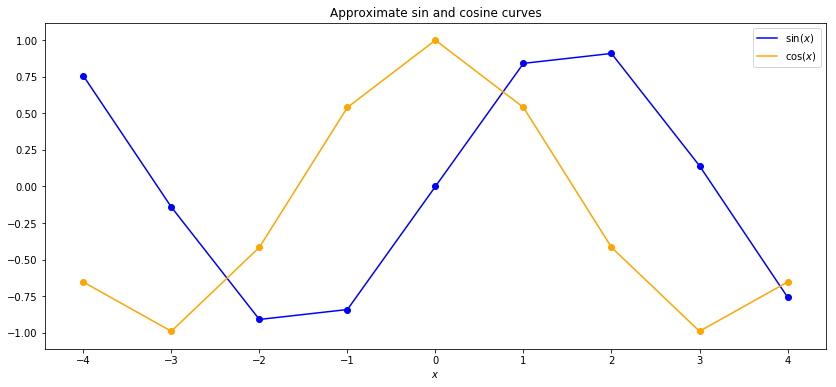

In [18]:
x = range(-4, 5)
sin_x = [math.sin(n) for n in x]
cos_x = [math.cos(n) for n in x]

plt.figure(figsize=(14, 6)) # (width, height)

plt.scatter(x, sin_x, c='blue')
plt.scatter(x, cos_x, c='orange')
plt.plot(x, sin_x, c='blue', label='$\sin(x)$')
plt.plot(x, cos_x, c='orange', label='$\cos(x)$')

plt.legend(loc='upper right')
plt.title('Approximate sin and cosine curves')
plt.xlabel('$x$')

plt.show()

## Saving Figures

The window that pops up when showing a chart has a save button on it that can be used to save figures to your computer, but we can also do this programmatically with the `.savefig` method.

This is important for creating reproducible results.


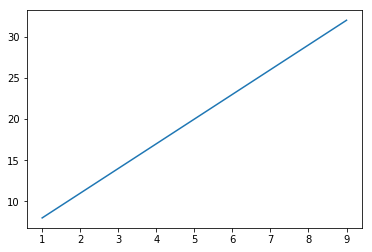

In [19]:
x = range(1, 10)
y = [3 * n + 5 for n in x]
plt.plot(x, y)
plt.savefig('my-figure')
plt.show()

The filetype will default to a png, but this can be changed by specifying
an extension in the filename passed to `savefig`.

## Subplots

We can create multiple charts together using the `.subplot` function. We'll need to specify the total number of rows, total number of columns, and which chart is currently the "active" chart.


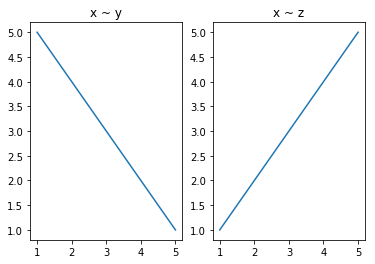

In [20]:
n_rows = 1
n_cols = 2

# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# plot the first subplot
plt.subplot(n_rows, n_cols, 1)
plt.plot(x, y)
plt.title('x ~ y')

# the second subplot
plt.subplot(n_rows, n_cols, 2)
plt.plot(x, z)
plt.title('x ~ z')

plt.show()

Using subplots is very common, and the number of rows, columns, and active chart can be be specified in a short hand of just one number.


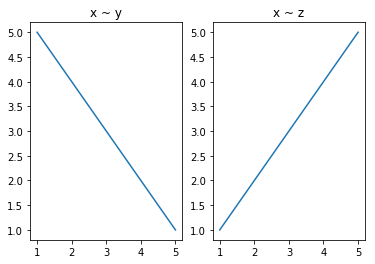

In [21]:
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# plot the first subplot
plt.subplot(121)
plt.plot(x, y)
plt.title('x ~ y')

# the second subplot
plt.subplot(122)
plt.plot(x, z)
plt.title('x ~ z')

plt.show()

Notice that while we can specify titles for the individual subplots, we can also specify an overall title for the chart with the `.suptitle` function.


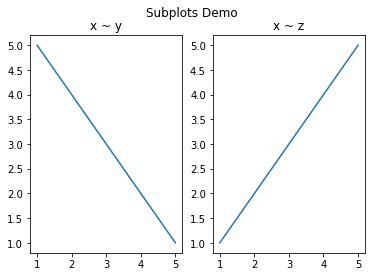

In [22]:
# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# plot the first subplot
plt.subplot(121)
plt.plot(x, y)
plt.title('x ~ y')

# the second subplot
plt.subplot(122)
plt.plot(x, z)
plt.title('x ~ z')

plt.suptitle('Subplots Demo')

plt.show()

## Histograms

We can create histograms with the `.hist` function.


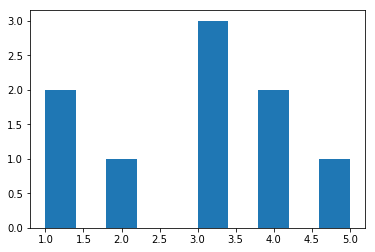

In [23]:
x = [1, 1, 2, 3, 3, 3, 4, 4, 5]

plt.hist(x)
plt.show()

If we don't tell matplotlib how to bin the data, it will do it's best to guess for us, but we can also explicitly specify the bins.


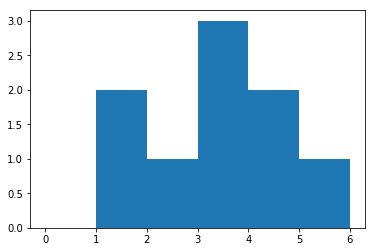

In [24]:
x = [1, 1, 2, 3, 3, 3, 4, 4, 5]

plt.hist(x, bins=[0, 1, 2, 3, 4, 5, 6])
plt.show()


The `align` property tells matplotlib how the bins should be aligned over the data that they represent. Here's an example of all 3 possible alignments: left, middle, and right:


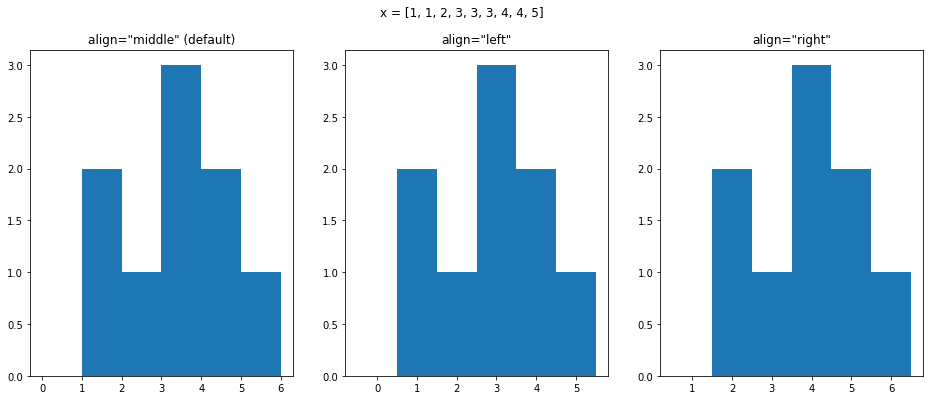

In [25]:
x = [1, 1, 2, 3, 3, 3, 4, 4, 5]

plt.figure(figsize=(16, 6))
plt.suptitle(f'x = {x}')

plt.subplot(131)
plt.hist(x, bins=[0, 1, 2, 3, 4, 5, 6])
plt.title('align="middle" (default)')

plt.subplot(132)
plt.hist(x, bins=[0, 1, 2, 3, 4, 5, 6], align='left')
plt.title('align="left"')

plt.subplot(133)
plt.hist(x, bins=[0, 1, 2, 3, 4, 5, 6], align='right')
plt.title('align="right"')

plt.show()

Like scatter and line charts, we can plot multiple histograms together. When doing so, sometimes it is useful to set the *alpha*, or transparency, for the colors.

We'll show two examples here, one using the same color for each series, one using different colors:


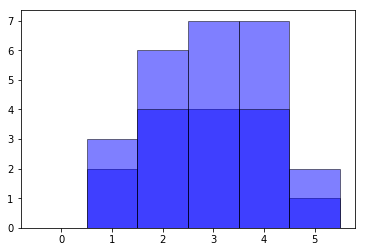

In [26]:
x1 = [randint(1, 5) for _ in range(20)]
x2 = [randint(1, 5) for _ in range(20)]

plt.hist(x1, bins=[0, 1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.5, color='blue')
plt.hist(x2, bins=[0, 1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.5, color='blue')

plt.show()

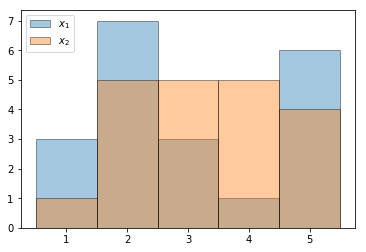

In [27]:
x1 = [randint(1, 5) for _ in range(20)]
x2 = [randint(1, 5) for _ in range(20)]

plt.hist(x1, bins=[1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.4, label='$x_1$')
plt.hist(x2, bins=[1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.4, label='$x_2$')
plt.legend()

plt.show()

As an alternative to having the series overlap, we can also plot the series side by side by passing the data series as a tuple to the `hist` function.


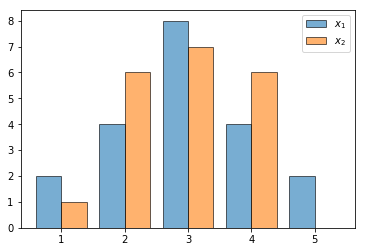

In [28]:
x1 = [randint(1, 5) for _ in range(20)]
x2 = [randint(1, 5) for _ in range(20)]

plt.hist((x1, x2), bins=[1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.6, label=['$x_1$', '$x_2$'])

plt.legend()
plt.show()

Let's take a look at one more example:


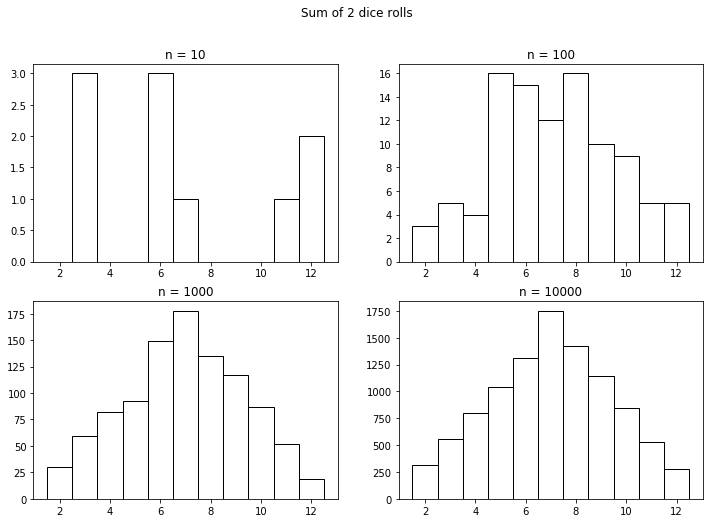

In [29]:
plt.figure(figsize=(12, 8))
for i in range(1, 5):
    n = 10 ** i
    x1 = [randint(1, 6) for _ in range(n)]
    x2 = [randint(1, 6) for _ in range(n)]

    total = [x + y for x, y in zip(x1, x2)]

    plt.subplot(2, 2, i)
    plt.hist(total, bins=range(2, 14), align='left', color='white', edgecolor='black')
    plt.title(f'n = {n}')

plt.suptitle('Sum of 2 dice rolls')
plt.show()

## Further Reading

- [Official Pyplot Tutorial](https://matplotlib.org/users/pyplot_tutorial.html)
- [LaTeX Math Cheat Sheet](http://www.auburn.edu/~tamtiny/Symbols.pdf)
- [Youtube Video Tutorial Series: Matplotlib for Beginners](https://www.youtube.com/watch?v=-czP9f363Vw&list=PLKvKQYhUTYu88ZTJugtU6kgFQrPAQ0PzM)

## Exercises

Continue using the `ds-libraries-exercises` repo, and do your work for this exercise in a jupyter notebook named `matplotlib_exercises`.

1. Use matplotlib to plot the following equation:

    $$
    y = x^2 - x + 2
    $$
    
    You'll need to write the code that generates the x and y points.

    Add an anotation for the point `0, 0`, as the origin.

1. Create and label 4 separate charts with the following equations (choose a range for x that makes sense):

    - $y = \sqrt{x}$
    - $y = x^3$
    - $y = 2^x$
    - $y = 1/(x+1)$

    You can use functions from the `math` module to help implement some of the equations above.

1. Combine the figures you created in the last step into one large figure with 4 subplots.

1. Combine the figures you created in the last step into one figure where each of the 4 equations has a different color for the points. Be sure to include a legend and an appropriate title for the figure.

1. Make a new Jupyter notebook named `big_o_notation.ipynb`

    - Title your chart "Big O Notation"
    - Label your x axis "Elements"
    - Label your y axis "Operations"
    - Label your curves or make a legend for the curves
    - Use LaTex notation where possible

    Curves to graph

    - $y = 0n + 1$ and label the curve "O(1)"
    - $y = log(n)$ and label the curve "O(log n)"
    - $y = n$ and label the curve "O(n)"
    - $y = n * log(n)$ and label it "O(n log n)"
    - $y = n^2$ and label it "O(n^2)"
    - $y = 2^n$ and label it "O(2^n)"
    - $y = n!$ and label it "O(n!)"
    - $y = n^n$ and label it "O(n^n)"
    

1. **Bonus** Write the code necessary to write your name on a chart. Use box letters.

1. **Bonus**: use curves for letters in your name that have curves in them.